In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

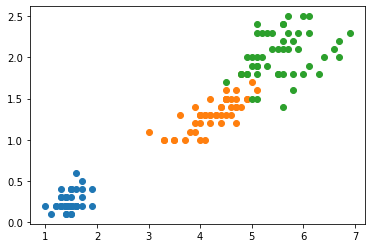

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [4]:
dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
dt_clf.fit(X, y)
dt_clf.score(X, y)

0.96

In [5]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

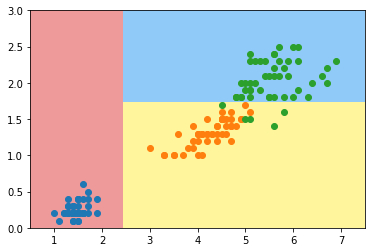

In [6]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

# 信息熵

In [7]:
def entropy(p):
    return -p * np.log(p) - (1-p) * np.log(1-p)

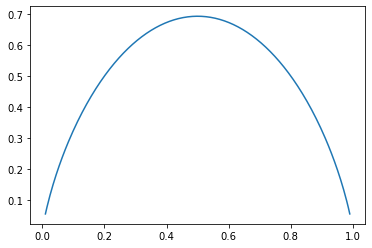

In [8]:
x = np.linspace(0.01, 0.99, 200)
plt.plot(x, entropy(x))
plt.show()

# 模拟使用信息熵进行划分

In [9]:
def split(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

In [10]:
from collections import Counter
from math import log

def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res

def try_split(X, y):
    
    best_entropy = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i], d] != X[sorted_index[i-1], d]:
                v = (X[sorted_index[i], d] + X[sorted_index[i-1], d])/2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                p_l, p_r = len(X_l) / len(X), len(X_r) / len(X)
                e = p_l * entropy(y_l) + p_r * entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v
                
    return best_entropy, best_d, best_v

In [11]:
try_split(X, y)

(0.46209812037329684, 0, 2.45)

In [12]:
best_entropy, best_d, best_v = try_split(X, y)
print("best_entropy =", best_entropy)
print("best_d =", best_d)
print("best_v =", best_v)

best_entropy = 0.46209812037329684
best_d = 0
best_v = 2.45


In [13]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [14]:
entropy(y1_l)

0.0

In [15]:
entropy(y1_r)

0.6931471805599453

In [16]:
best_entropy2, best_d2, best_v2 = try_split(X1_r, y1_r)
print("best_entropy =", best_entropy2)
print("best_d =", best_d2)
print("best_v =", best_v2)

best_entropy = 0.2147644654371359
best_d = 1
best_v = 1.75


In [17]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)

In [18]:
entropy(y2_l)

0.30849545083110386

In [19]:
entropy(y2_r)

0.10473243910508653

# 基尼系数

In [20]:
dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
dt_clf.fit(X, y)
dt_clf.score(X, y)

0.96

In [21]:
dt_clf = DecisionTreeClassifier(max_depth=2, criterion="gini")
dt_clf.fit(X, y)
dt_clf.score(X, y)

0.96

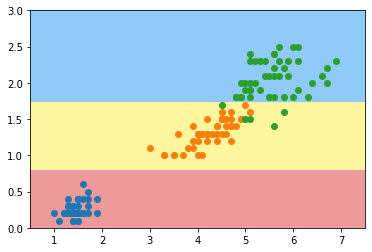

In [22]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

# 模拟使用基尼系数进行划分

In [23]:
from collections import Counter
from math import log

def split(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res -= p**2
    return res

def try_split(X, y):
    
    best_g = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i], d] != X[sorted_index[i-1], d]:
                v = (X[sorted_index[i], d] + X[sorted_index[i-1], d])/2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                p_l, p_r = len(X_l) / len(X), len(X_r) / len(X)
                g = p_l * gini(y_l) + p_r * gini(y_r)
                if g < best_g:
                    best_g, best_d, best_v = g, d, v
                
    return best_g, best_d, best_v

In [24]:
best_g, best_d, best_v = try_split(X, y)
print("best_g =", best_g)
print("best_d =", best_d)
print("best_v =", best_v)

best_g = 0.3333333333333333
best_d = 0
best_v = 2.45


In [25]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)
gini(y1_l)

0.0

In [26]:
gini(y1_r)

0.5

In [27]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)
gini(y2_l)

0.1680384087791495

In [28]:
gini(y2_r)

0.04253308128544431